In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)
import seaborn as sns

In [2]:
my_data = pd.read_csv('Python_project_eda.csv')

In [3]:
# View data head
my_data.head(5)

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,1.832130e+19,1
1,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,1.370540e+19,1
2,0,NaN,IN,0,False,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,6.605720e+18,0
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2.340070e+18,1
4,7,1.0,PL,1,True,1.0,1.0,NaN,0.0,1.0,1,0.0,0.0,1.189100e+19,1


In [4]:
# shape of data
my_data.shape

(566699, 15)

## **Check Missing Value**

In [5]:
# Remove Duplicates
my_data = my_data.drop_duplicates()

In [6]:
# Check missing value
my_data.shape[0] - my_data.count()

buyer_week_before              0
clicked_buy_before         70803
country                    12480
existing_buyer                 0
initial_fop_set                0
made_purchase_before       70803
saw_cart_before            70803
spend_usd_next_14_days    470959
user_added_credit_card    389434
user_added_dcb            389434
user_added_fop                 0
user_added_gift_card      389434
user_added_paypal         389434
user_id                        0
visit_before                   0
dtype: int64

In [7]:
# remove NA in payment methods
df = my_data.dropna(subset = ['made_purchase_before', 'clicked_buy_before', 'country', 'saw_cart_before'])

# fill na with 0
df = df.fillna(0)

In [8]:
df.shape[0] - df.count()

buyer_week_before         0
clicked_buy_before        0
country                   0
existing_buyer            0
initial_fop_set           0
made_purchase_before      0
saw_cart_before           0
spend_usd_next_14_days    0
user_added_credit_card    0
user_added_dcb            0
user_added_fop            0
user_added_gift_card      0
user_added_paypal         0
user_id                   0
visit_before              0
dtype: int64

In [9]:
# The length of the data now
len(df)

477946

## **Additional - How to Find Top Countries**

In [10]:
df.head()

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,1.832130e+19,1
1,0,0.0,IN,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,1.370540e+19,1
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2.340070e+18,1
4,7,1.0,PL,1,True,1.0,1.0,0.000000,0.0,1.0,1,0.0,0.0,1.189100e+19,1
5,0,0.0,ID,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,1.696040e+19,1


In [11]:
df.groupby(['country']).size()

country
AE     1819
AF       12
AG       16
AI        1
AL      310
AM      325
AO       59
AR     9037
AS        5
AT     1206
AU     3098
AW       19
AX        1
AZ      913
BA      443
BB        3
BD     3650
BE      894
BF       27
BG      949
BH      410
BJ       29
BN       20
BO     1135
BQ        7
BR    30309
BS       66
BT        2
BW       15
BY     1348
      ...  
SO        2
SR        1
SV      772
SY      563
TG       21
TH     9531
TJ      170
TL        3
TM      132
TN     1311
TR    15218
TT      158
TW     4926
TZ      208
UA     4661
UG       46
US    58989
UY      673
UZ      353
VE     1042
VG        1
VI        6
VN    11872
VU        1
WS        1
XK       74
YE      294
ZA     1750
ZM       39
ZW       34
Length: 191, dtype: int64

In [12]:
country_rank = df.groupby(['country']).size().reset_index(name='counts')

In [13]:
country_rank

,country,counts
0,AE,1819
1,AF,12
2,AG,16
3,AI,1
4,AL,310
5,AM,325
6,AO,59
7,AR,9037
8,AS,5
9,AT,1206


In [14]:
country_rank = country_rank.sort_values('counts', ascending = False)[:10]
country_rank

,country,counts
177,US,58989
80,IN,58113
76,ID,33536
25,BR,30309
151,RU,20339
88,JP,17569
171,TR,15218
124,MX,12930
93,KR,12608
183,VN,11872


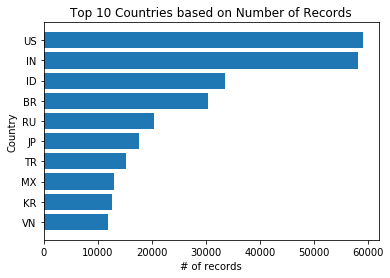

In [15]:
 # Create horizontal bars
plt.barh(country_rank['country'], country_rank['counts'])

# Create names on the y-axis
y_pos = np.arange(len(country_rank['country']))
plt.yticks(y_pos, country_rank['country'])
plt.title('Top 10 Countries based on Number of Records')
plt.xlabel('# of records') 
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.show()

## **Exploration - Spend USD in next 14 Days**

In [16]:
spend_usd_next_14_days = df.spend_usd_next_14_days

In [17]:
spend_usd_next_14_days.describe()

count    477946.000000
mean         12.228711
std          94.953851
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       22519.570000
Name: spend_usd_next_14_days, dtype: float64

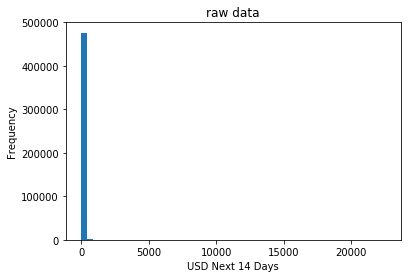

In [18]:
plt.hist(spend_usd_next_14_days, bins = 50)
plt.xlabel("USD Next 14 Days")
plt.ylabel("Frequency")
plt.title("raw data")
plt.show()

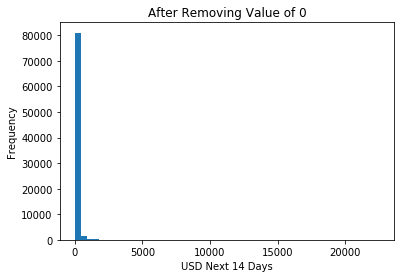

In [19]:
# Remove value of 0
plt.hist(spend_usd_next_14_days[spend_usd_next_14_days != 0], bins = 50)
plt.xlabel("USD Next 14 Days")
plt.ylabel("Frequency")
plt.title("After Removing Value of 0")
plt.show()

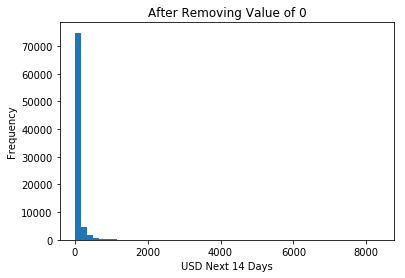

In [20]:
# Remove value of 0
plt.hist(spend_usd_next_14_days[(0 < spend_usd_next_14_days) & (spend_usd_next_14_days < 10000)], bins = 50)
plt.xlabel("USD Next 14 Days")
plt.ylabel("Frequency")
plt.title("After Removing Value of 0")
plt.show()

In [21]:
n = len(spend_usd_next_14_days) + 0.0
print('# users who spend larger than 100 USD', len(spend_usd_next_14_days[spend_usd_next_14_days >= 100]) / n)
print('# users who spend larger than 500 USD', len(spend_usd_next_14_days[spend_usd_next_14_days >= 500]) / n)

# users who spend larger than 100 USD 0.027942487226590453
# users who spend larger than 500 USD 0.003799592422574935


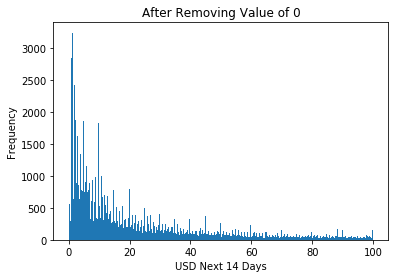

In [22]:
plt.hist(spend_usd_next_14_days[(spend_usd_next_14_days <= 100) & (spend_usd_next_14_days != 0)], bins = 300)
plt.xlabel("USD Next 14 Days")
plt.ylabel("Frequency")
plt.title("After Removing Value of 0")
plt.show()

In [23]:
# If purchased before...
purchased = df[df['made_purchase_before'] == 1]
purchased_spend_rate = len(purchased[purchased['spend_usd_next_14_days'] != 0]) / (len(purchased) + 0.0)

# print reuslts
print('If purchased before, the spend rate is: ', purchased_spend_rate)

If purchased before, the spend rate is:  0.7310455143176777


## **Purchase Funnel**

In [24]:
# for each stage
n_total = len(my_data)
n_visited = len(df)
n_saw = df['saw_cart_before'].sum()
n_clicked = df['clicked_buy_before'].sum()
n_purchased = df['made_purchase_before'].sum()

# create dataframe 
funnel_df = pd.DataFrame(columns=['action', 'num', 'cr_stage'])
funnel_df['action'] = ['visited', 'saw', 'clicked', 'purchased']
funnel_df['num'] = [n_visited, n_saw, n_clicked, n_purchased]
# cr_stage = each action # / total #
funnel_df['cr_stage'] = np.array([n_visited, n_saw, n_clicked, n_purchased]) / n_total

# print table
print('Number of users and conversion rate for each stage:')
print(funnel_df)

Number of users and conversion rate for each stage:
      action       num  cr_stage
0    visited  477946.0  0.853492
1        saw  445594.0  0.795719
2    clicked  124213.0  0.221813
3  purchased  101902.0  0.181971


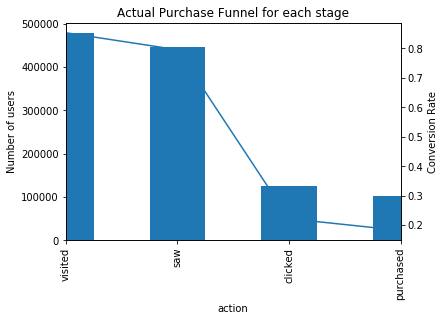

In [25]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
funnel_df.plot.bar('action','num', ax = ax1, legend=False)
funnel_df.plot('action','cr_stage', ax = ax2, legend=False)
ax1.set_ylabel('Number of users')
ax2.set_ylabel('Conversion Rate')
ax1.set_title('Actual Purchase Funnel for each stage')
plt.show()

In [26]:
funnel_df['stage_stage'] = ['begin_visited', 'visited_saw', 'saw_clicked', 'clicked_purchase']
funnel_df['cr_from_to'] = [n_visited/(n_total + 0.0), n_saw/n_visited, n_clicked/n_saw, n_purchased/n_clicked]
print('converstion rate stage-to-stage')
print(funnel_df[['stage_stage', 'cr_from_to']])

converstion rate stage-to-stage
        stage_stage  cr_from_to
0     begin_visited    0.853492
1       visited_saw    0.932310
2       saw_clicked    0.278758
3  clicked_purchase    0.820381


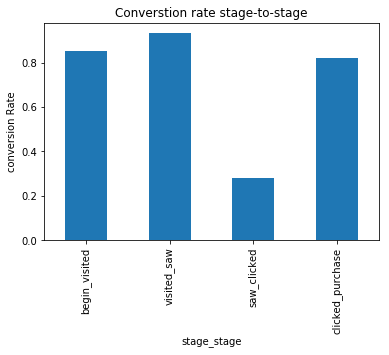

In [27]:
funnel_df.plot.bar('stage_stage', 'cr_from_to', legend = False)
plt.ylabel('conversion Rate')
plt.title('Converstion rate stage-to-stage')
plt.show()

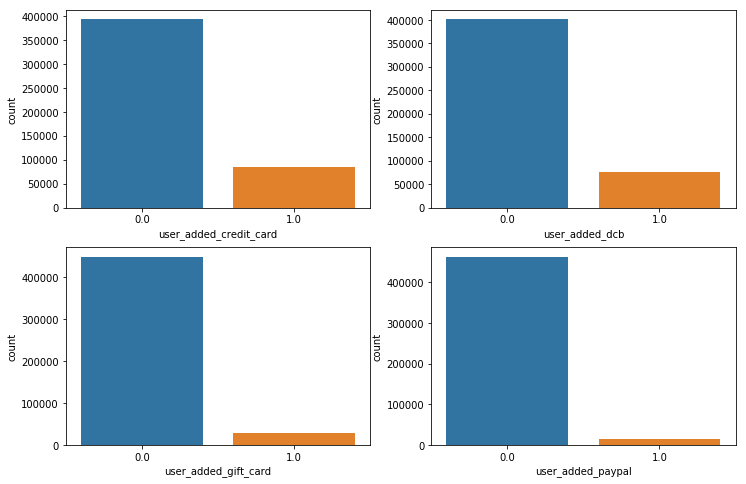

In [28]:
# find the distribution of payment method
target_features = ['user_added_credit_card', 'user_added_dcb', 'user_added_gift_card', 'user_added_paypal']

# categorical histograms
fig = plt.figure(figsize=(12, 8))
for i, column in enumerate(target_features):
  fig.add_subplot(2,2, i+1)
  sns.countplot(df[column]) # for discrete numbers
  # for continous number: sns.distplot(df[column])

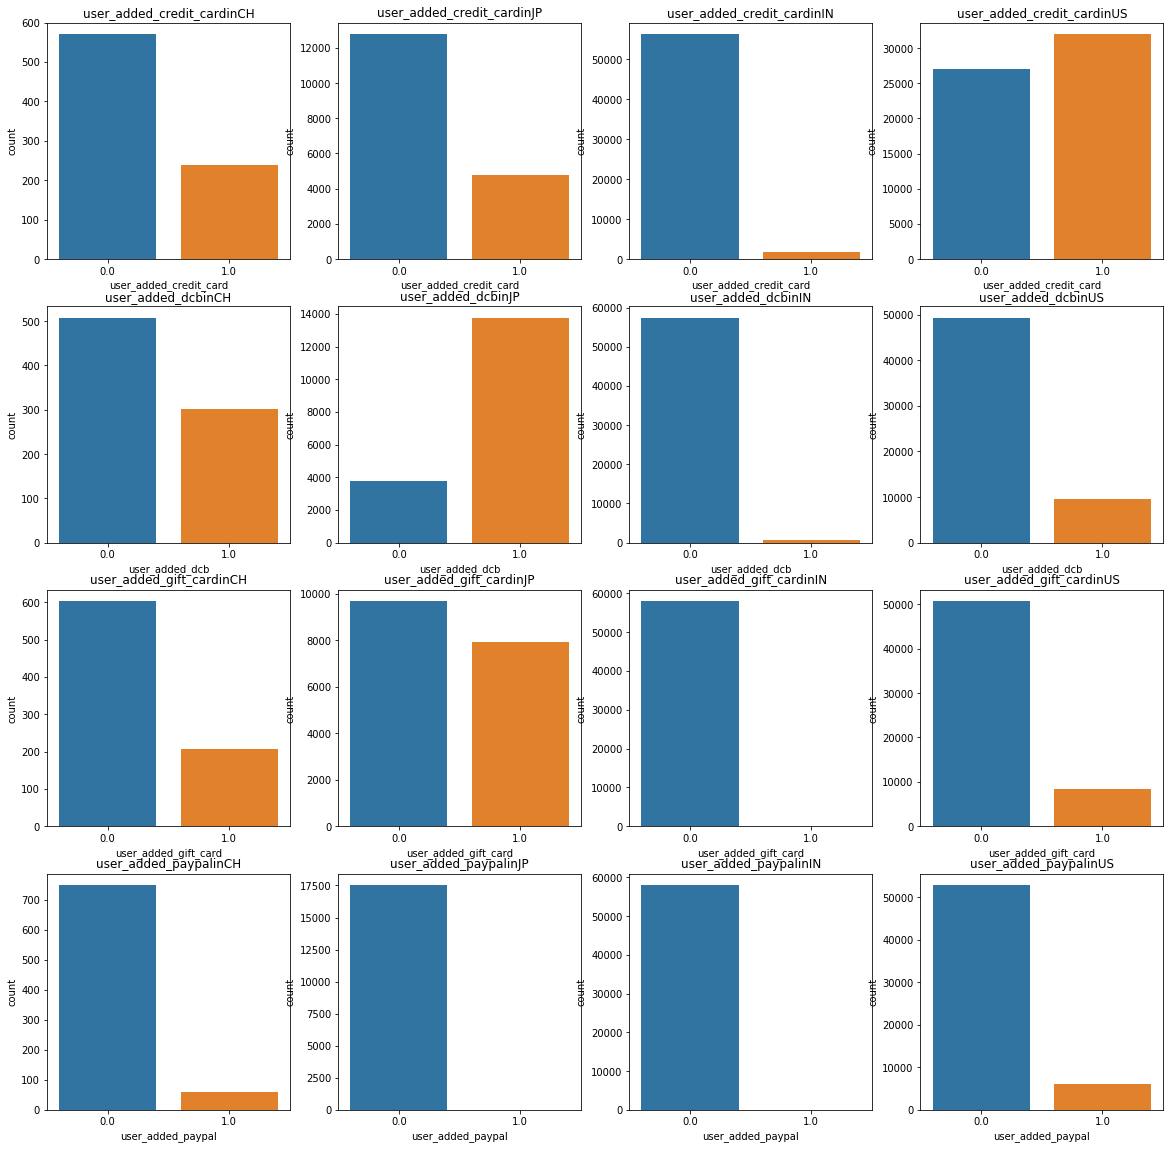

In [29]:
# Analyst through different country
country = ['CH', 'JP', 'IN', 'US']
count = 1
fig = plt.figure(figsize = (20, 20))
for i, fop in enumerate(target_features):
  for j, c in enumerate(country):
    fig.add_subplot(4,4, count)
    sns.countplot(df[df['country'] == c][fop])
    plt.title(fop + 'in' + c)
    count += 1

In [30]:
# Add multiple payment method vs. Add single payment method
def cr_fop(stage_interval, obj, df):
    tmp = df[df[obj] == 1][stage_interval].sum()
    return tmp[1] / tmp[0]

stage_interval = ['clicked_buy_before', 'made_purchase_before']

# Calculate multiple fop conversion rate
multiple_fop = []
for obj in target_features:
  cr = cr_fop(stage_interval, obj, df)
  multiple_fop.append(cr)

# Calculate single fop conversion rate
df['user_added_sum'] = df['user_added_credit_card'] + df['user_added_dcb'] + df['user_added_gift_card'] + df['user_added_paypal']
single_fop_df = df[df['user_added_sum'] == 1]
single_fop = []
for obj in target_features:
  cr = cr_fop(stage_interval, obj, single_fop_df)
  single_fop.append(cr)

FOP conversion rate:
                      fop  multiple_fop  single_fop
0  user_added_credit_card      0.863659    0.809614
1          user_added_dcb      0.814669    0.711622
2    user_added_gift_card      0.960136    0.953946
3       user_added_paypal      0.883465    0.784256


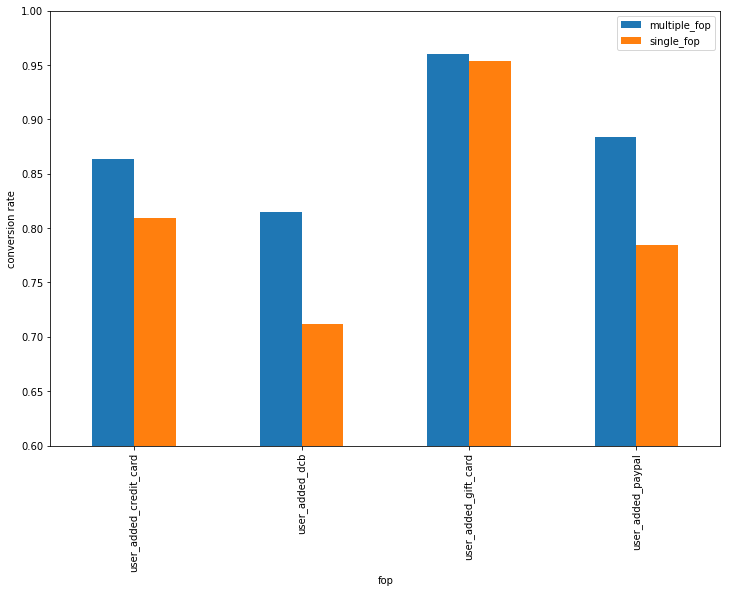

In [31]:
# draw bar plot
res_fop_df = pd.DataFrame(columns=['fop', 'multiple_fop', 'single_fop'])
res_fop_df['fop'] = target_features
res_fop_df['multiple_fop'] = multiple_fop
res_fop_df['single_fop'] = single_fop
print ('FOP conversion rate:')
print (res_fop_df)

res_fop_df.plot.bar(x = 'fop', y = ['multiple_fop', 'single_fop'], figsize = (12, 8))
plt.ylim(0.6, 1.0)
plt.ylabel('conversion rate')
plt.show()

## A/B Test

In [32]:
my_data = pd.read_csv('Python_project_experiment.csv')

In [33]:
experiment = my_data
experiment.head(20)

,country,date,experiment_id,order_id,spend_usd,user_bucket,user_id,vertical
0,NaN,NaN,12624549,NaN,0.000000,3,1.660000e+19,NaN
1,NaN,NaN,12624548,NaN,0.000000,14,1.440000e+19,NaN
2,NaN,NaN,12624549,NaN,0.000000,20,8.430000e+18,NaN
3,NaN,NaN,12624549,NaN,0.000000,16,1.130000e+19,NaN
4,NaN,NaN,12624549,NaN,0.000000,14,1.400000e+18,NaN
5,NaN,NaN,12624549,NaN,0.000000,3,2.990000e+17,NaN
6,NaN,NaN,12624548,NaN,0.000000,6,7.170000e+18,NaN
7,NaN,NaN,12624549,NaN,0.000000,15,8.560000e+17,NaN
8,NaN,NaN,12624548,NaN,0.000000,4,7.070000e+18,NaN
9,NaN,NaN,12624549,NaN,0.000000,5,1.030000e+19,NaN


In [34]:
control = experiment[experiment['experiment_id'] == 12624549]['spend_usd']
case = experiment[experiment['experiment_id'] == 12624548]['spend_usd']

print('Total number of experiment users is', len(experiment))
print('Number of users in case group', len(case))
print('Number of users in control group', len(control))

Total number of experiment users is 49166
Number of users in case group 24695
Number of users in control group 24471


In [35]:
print('Statistical summary for case group:')
print(case.describe())
print('Statistical summary for control group:')
print(control.describe())

Statistical summary for case group:
count    24695.000000
mean         3.101232
std         11.647487
min          0.000000
25%          0.000000
50%          0.000000
75%          0.975661
max        119.990000
Name: spend_usd, dtype: float64
Statistical summary for control group:
count    24471.000000
mean         2.807225
std         10.974284
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        199.990000
Name: spend_usd, dtype: float64


In [36]:
# Calculate potential increasing revenue
(3.1 - 2.8) / 2.8

0.10714285714285725

In [37]:
# perform two sample one side t-test on case/control group
from scipy import stats
stats.ttest_ind(case, control, equal_var=False)

Ttest_indResult(statistic=2.880888081055276, pvalue=0.0039672827581814325)